In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os

In [4]:
file_path = '/localdata/Stats_Project/20180519/GLM_data/'
#filename = 'OR_GLM-L2-LCFA_G16_s20181400259400_e20181400300000_c20181400300029.nc'

In [81]:
#Function that assigns the window to pull the data from as a function of time
def frames(dtime):
    if dtime < datetime.datetime(2019, 6, 1, 1, 54, 0):
        nw_lat = 40.58
        nw_lon = -95.37
        se_lat = 40.12
        se_lon = -92.35
    elif dtime > datetime.datetime(2019, 4, 4, 1, 54, 0):
        nw_lat = 35.11
        nw_lon = -98.95
        se_lat = 34.19
        se_lon = -97.40
        
    return nw_lat,nw_lon,se_lat,se_lon

In [82]:
#A function that takes in the file name and returns the data cut to a desired lat/lon, and the time
def load_data(nc_file):
    #Getting the time
    dtime = nc.num2date(nc_file.variables['product_time'][:],nc_file.variables['product_time'].units)
    
    #Getting the lat,lon bounds you need
    nw_lat,nw_lon,se_lat,se_lon = frames(dtime)
    
    #Loading in the data
    data = nc_file.variables['flash_energy']
    lat = nc_file.variables['flash_lat'][:]
    lon = nc_file.variables['flash_lon'][:]
    
    #Find the data that 
    data_locs = np.where((lat >= se_lat) & (lat <= nw_lat) & (lon >= nw_lon) & (lon <= se_lon))[0]
    data_cut = data[data_locs]
    lat_cut = lat[data_locs]
    lon_cut = lon[data_locs]
    
    return data_cut,lat_cut,lon_cut, dtime

In [83]:
#A function that checks for matches from the new array and total array spatially
#adds to that point if so, and then concaternates the 'null' matches
def match_maker(data,total_data,lat,total_lat,lon,total_lon):
    counter1 = np.arange(0,len(data),1) #Counter for the new data
    counter2 = np.arange(0,len(total_data),1) #Counter for total data
    
    for i in counter1:
        for j in counter2:
            if (lat[i]==total_lat[j]) & (lon[i]==total_lon[j]):
                total_data[j] += data[i]
                del(data[i])
                del(lat[i])
                del(lon[i])
                print ('A Match!')
    total_data = np.concatenate((data,total_data),axis=0)
    total_lat = np.concatenate((lat,total_lat),axis=0)
    total_lon = np.concatenate((lon,total_lon),axis=0)

    return total_data,total_lat,total_lon

In [87]:
output = np.empty([0])
times = np.empty([0])

for file_name in os.listdir(file_path):
    nc_file = nc.Dataset(file_path+file_name,'r')
    data,lat,lon,time = load_data(nc_file)
    seconds = time.strftime('%S')
    if seconds == '00':
        times = np.append(times,time)
        total_data = data
        total_lat = lat
        total_lon = lon
    elif seconds == '20':
        total_data,total_lat,total_lon = match_maker(data,total_data,lat,total_lat,lon,total_lon)
    elif seconds == '40':
        total_data,total_lat,total_lon = match_maker(data,total_data,lat,total_lat,lon,total_lon)
        if len(total_data) >= 1:
            output = np.append(output, np.max(total_data))
        else:
            output = np.append(output, 0)
print (output)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.74674591e-14 0.00000000e+00
 1.63278787e-13 1.38863273e-13 8.80484704e-13 0.00000000e+00
 3.90648316e-13 6.47011253e-13 4.54739057e-13 1.06207512e-12
 4.24219660e-13 8.02660184e-13 2.39577292e-13 5.72238762e-13
 9.32367681e-13 9.14056049e-13 6.88212454e-13 1.69382669e-13
 8.40809464e-13 3.891223

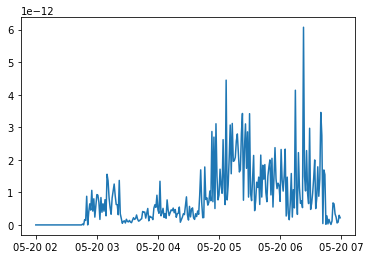

In [88]:
plt.plot(times,output)
plt.show()

In [35]:
print (nc_file.variables['product_time'].units)

print (nc_file.variables['goes_lat_lon_projection'])

seconds since 2000-01-01 12:00:00
<class 'netCDF4._netCDF4.Variable'>
int32 goes_lat_lon_projection()
    long_name: GOES-R latitude / longitude projection
    grid_mapping_name: latitude_longitude
    semi_major_axis: 6378137.0
    semi_minor_axis: 6356752.31414
    inverse_flattening: 298.2572221
    longitude_of_prime_meridian: 0.0
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -2147483647 used



In [33]:
datetime.datetime.utcfromtimestamp(nc_file.variables['product_time'][:])

datetime.datetime(1988, 5, 19, 14, 59, 40)

In [14]:
nc_file.variables['event_count'][:].shape

()

In [9]:
nc_file

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    created_by: inge GLM GRB-R v1.0.0 grbgamma.ssec.wisc.edu
    production_site: WCDAS
    featureType: point
    orbital_slot: GOES-East
    platform_ID: G16
    dataset_name: OR_GLM-L2-LCFA_G16_s20181400400000_e20181400400200_c20181400400225.nc
    naming_authority: gov.nesdis.noaa
    institution: DOC/NOAA/NESDIS> U.S. Department of Commerce, National Oceanic and Atmospheric Administration, National Environmental Satellite, Data, and Information Services
    project: GOES
    iso_series_metadata_id: f5816f53-fd6d-11e3-a3ac-0800200c9a66
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    keywords_vocabulary: NASA Global Change Master Directory (GCMD) Earth Science Keywords, Version 7.0.0.0.0
    standard_name_vocabulary: CF Standard Name Table (v25, 05 July 2013)
    title: GLM L2 Lightning Detections: Events, Groups, and Flashes
    summary: The Lightning Detections: Events, Groups, and F

In [18]:
print (nc_file.variables['event_id'][:])

[656107858 656107859 656107861 ... 656126920 656126921 656126922]


(18895,)


(18895,)